In [93]:
import numpy as np
import os
import pandas as pd
OUTPUT_FOLDER = "../new_sorted_outputs/"

used_values = [0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

trys_matrix = np.zeros((len(used_values), len(used_values)))
dist_matrix = np.zeros((len(used_values), len(used_values)))
for folder_name in os.listdir(OUTPUT_FOLDER):
    folder_path = os.path.join(OUTPUT_FOLDER, folder_name)
    
    # Solo procesa si es una carpeta con el formato esperado
    if os.path.isdir(folder_path) and folder_name.startswith("a_") and "_b_" in folder_name:
        try:
            # Extrae los valores de a y b del nombre de la carpeta
            a_value = float(folder_name.split("_")[1])
            b_value = float(folder_name.split("_")[3])
            a_index = used_values.index(a_value)
            b_index = used_values.index(b_value)
        except (IndexError, ValueError) as e:
            print(f"Error al extraer valores de a y b de {folder_name}: {e}")
            continue
        for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                try:
                    
                    # Cargar el archivo CSV (puedes ajustar los parámetros de read_csv según el formato)
                    df = pd.read_csv(file_path)
                    last = df.iloc[-1]
                    trys_matrix[a_index, b_index] = last["try_count"]
                    dist_matrix[a_index, b_index] = np.around(np.mean(np.abs(np.array(df[" mx"]) - 100)), decimals=2)
                    print(np.mean(np.abs(np.array(df[" mx"]) - 100)))
                except Exception as e:
                    print(f"Error al procesar el archivo {file_path}: {e}")


10.430740623727669
14.63486904727581
18.449284135539862
1.3461075740695059
3.4230585529014808
1.0023079165582314
21.0512867735992
2.3789906309890982
1.0851931378559891
3.005357735810401
21.96954673294994
3.202953501389246
15.206395300308264
8.609965002943932
24.41502675214769
21.80520155251975
22.740757290475404
19.046770920546468
9.617974286899244
0.9404577568878049
21.75333780703619
19.12446167768602
7.567608103453022
20.879394502464965
7.89285942817854
19.300822849173194
19.037762863341225
1.426250224624624
5.972499093980061
21.266826792381288
22.402858273962728
20.349541484439783
6.315926936021054
22.08430111070516
22.921710565245515
18.5923900543881
22.842664799415182
15.446114451149572
7.064951541761778
21.15834754114935
18.051172262365828
19.80156957961696
22.326371997520507
1.7850024763179348
18.352638307969766
14.46691639852504
20.21699183303942
5.246582942144848
11.958900896594672
19.461488058944045
5.494049744864813
14.011360525987195
0.853181869208761
1.6216674923622423
7.0

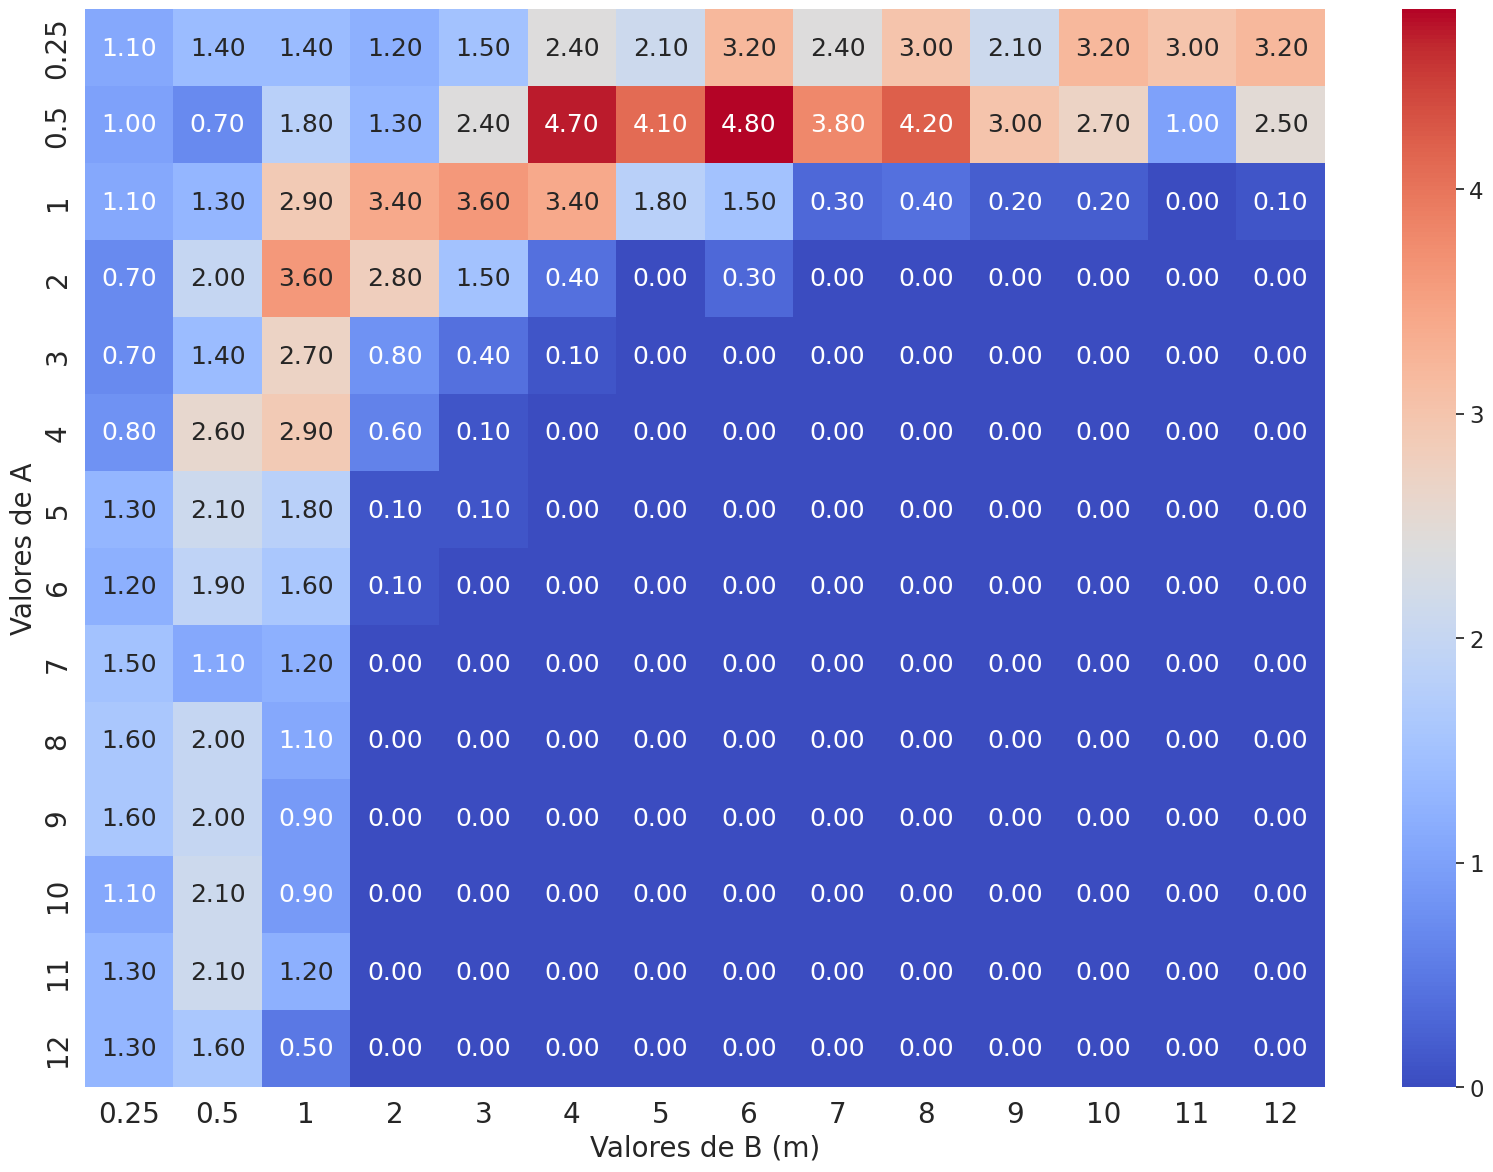

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
data_matrix = trys_matrix.copy()
data_matrix = data_matrix / 1000 * 100
# Create the heatmap
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.5)
sns.heatmap(data_matrix, cmap="coolwarm", xticklabels=used_values, yticklabels=used_values, annot=True, fmt=".2f")


plt.xticks(fontsize=20)      # Font size for x-axis tick labels
plt.yticks(fontsize=20)      # Font size for y-axis tick labels
plt.xlabel("Valores de B (m)", fontsize=20)  # Font size for x-axis label
plt.ylabel("Valores de A", fontsize=20)  # Font size for y-axis label
plt.show()


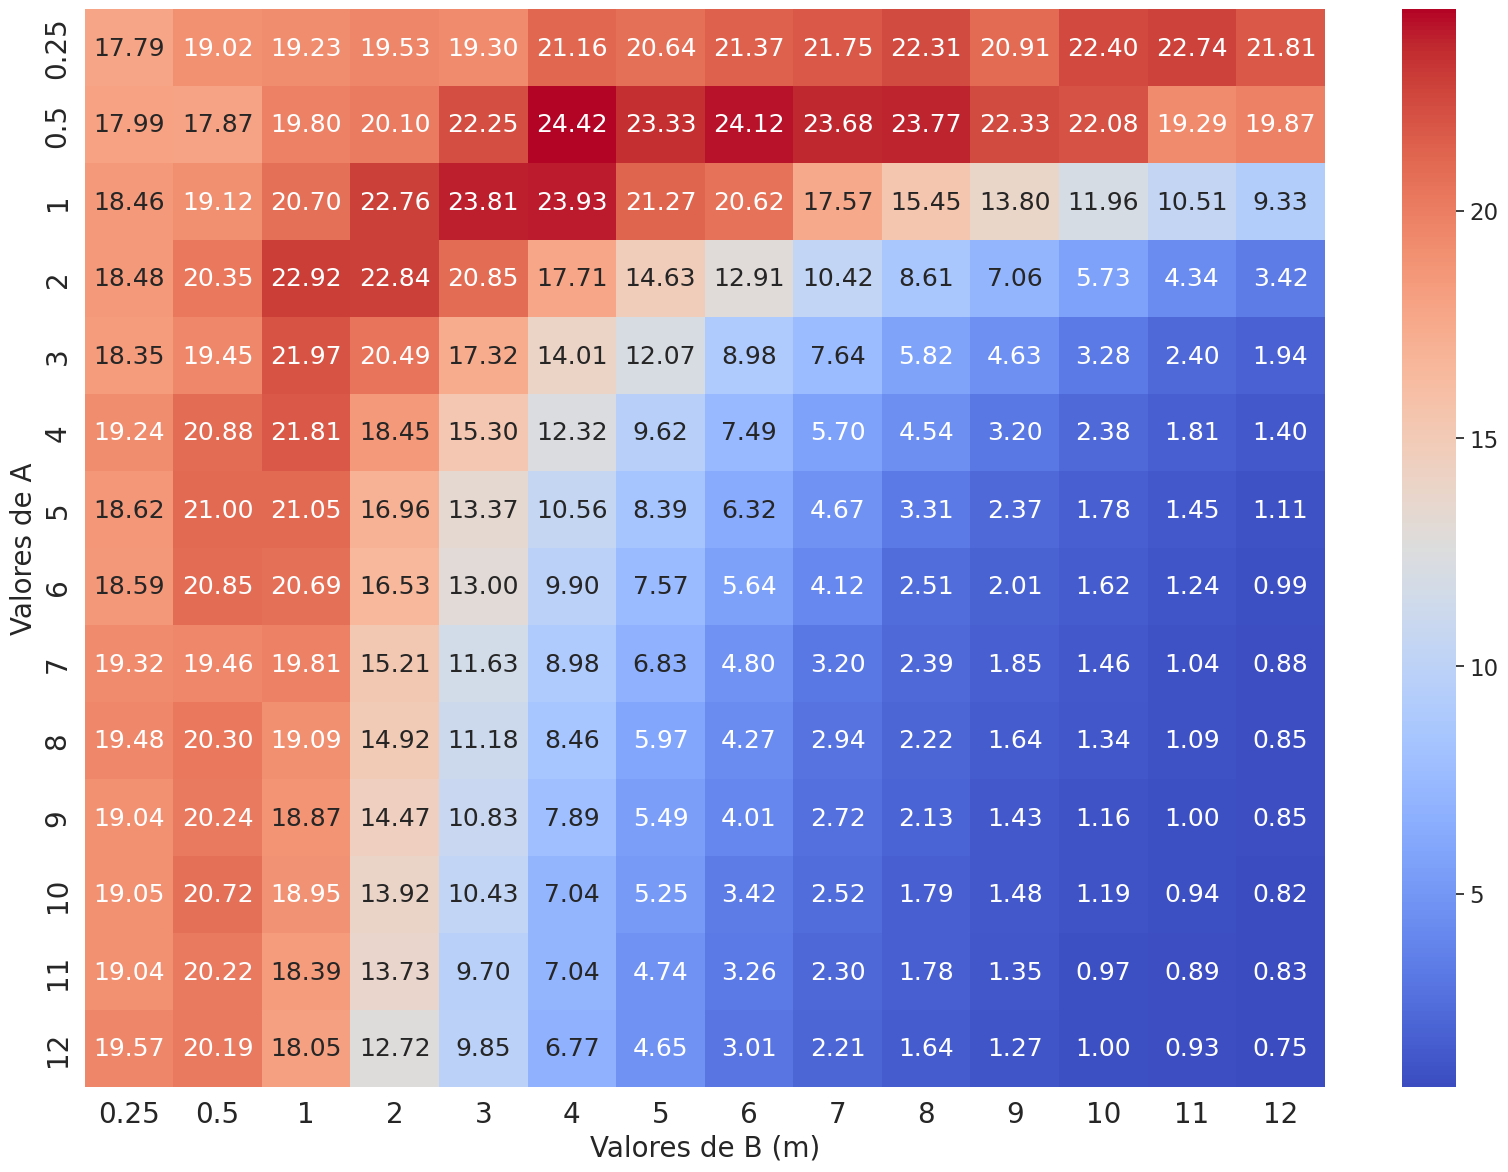

In [104]:
data_matrix = dist_matrix.copy()
#data_matrix = data_matrix / 1000 * 100
# Create the heatmap
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.5)
sns.heatmap(data_matrix, cmap="coolwarm", xticklabels=used_values, yticklabels=used_values, annot=True, fmt=".2f")


plt.xticks(fontsize=20)      # Font size for x-axis tick labels
plt.yticks(fontsize=20)      # Font size for y-axis tick labels
plt.xlabel("Valores de B (m)", fontsize=20)  # Font size for x-axis label
plt.ylabel("Valores de A", fontsize=20)  # Font size for y-axis label
plt.show()


In [51]:
n_values = [15, 20, 25, 30, 45, 60, 75, 90, 100]
dicts = {"trys": {}, "dist":{}}

# Carpeta raíz
root_folder = "../new_multiple_n_outputs"

# Recorre todas las combinaciones de a y b
for a_b_folder in os.listdir(root_folder):
    a_b_path = os.path.join(root_folder, a_b_folder)
    if a_b_folder not in dicts:
        dicts["trys"][a_b_folder] = []
        dicts["dist"][a_b_folder] = []
    if os.path.isdir(a_b_path):
        sorted_folders = sorted(
            os.listdir(a_b_path),
            key=lambda x: int(x.split("_")[1])  # Extracts and converts the value after "n_" to an integer
        )
        # Recorre cada subcarpeta para los valores de n
        for n_folder in sorted_folders:
            n_path = os.path.join(a_b_path, n_folder)
            if os.path.isdir(n_path):                
                # Recorre cada archivo output_n.csv en la carpeta n_folder
                for output_filename in sorted(os.listdir(n_path)):
                    if output_filename.startswith("output") and output_filename.endswith(".csv"):
                        output_file_path = os.path.join(n_path, output_filename)
                        # Leer la última línea del archivo actual usando pandas
                        try:
                            df = pd.read_csv(output_file_path)
                            last_line = df.iloc[-1]  # Obtiene la última fila como cadena
                            dicts["trys"][a_b_folder].append(last_line["try_count"])
                            dicts["dist"][a_b_folder].append(np.array(df[" mx"]))
                        except Exception as e:
                            print(f"Error al procesar {output_file_path}: {e}")

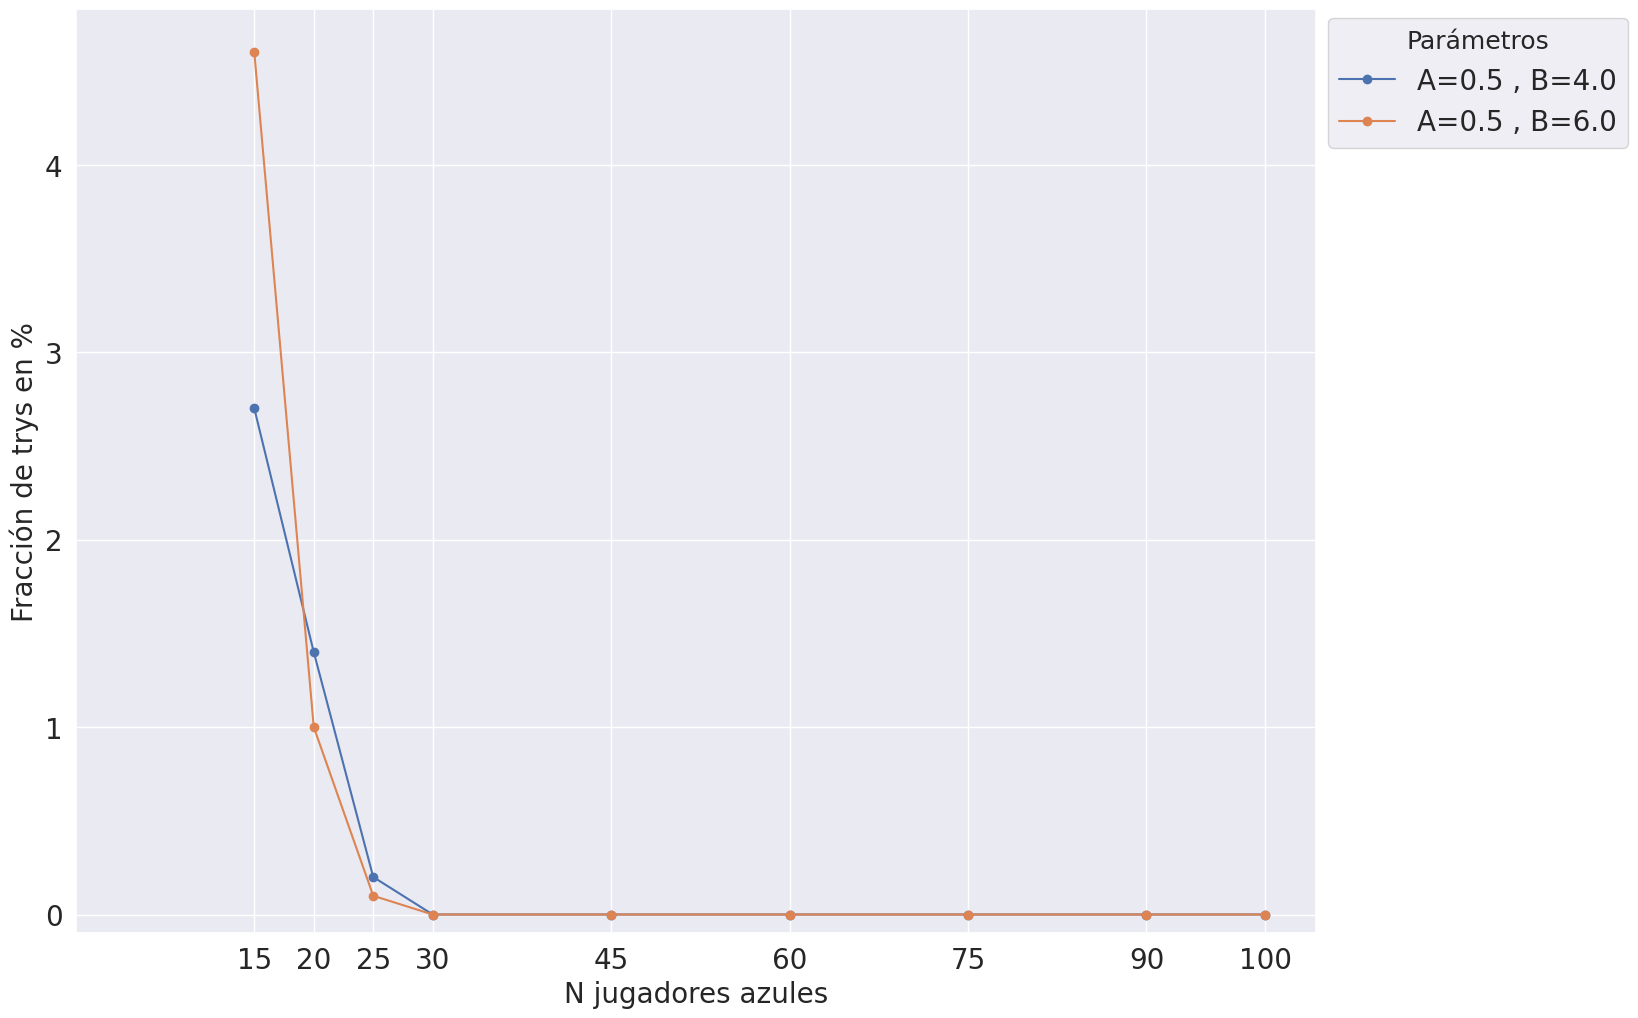

In [88]:
import matplotlib.pyplot as plt

trys_dict = dicts["trys"]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 12))

# Graficar cada conjunto de datos (a=4, b=1 y a=6, b=0.5)
for label, stats in trys_dict.items():
    stats = np.array(stats)
    # Extrae los valores de a y b del nombre de la carpeta
    a_value = float(label.split("_")[1])
    b_value = float(label.split("_")[3]) 
    ax.errorbar(n_values, stats / 1000 * 100, label=f'A={a_value} , B={b_value}', fmt='o-', capsize=5)

# Personalizar el gráfico
ax.set_xlabel("N jugadores azules", fontsize=20)
ax.set_ylabel("Fracción de trys en %", fontsize=20)
ax.legend(title="Parámetros", fontsize= 20, loc=(1.01, 0.85))
ax.set_xticks(n_values)
ax.tick_params(labelsize=20)
ax.set_xlim(left=0)
ax.set_ylim(bottom=-0.1)
plt.grid(True)
plt.show()

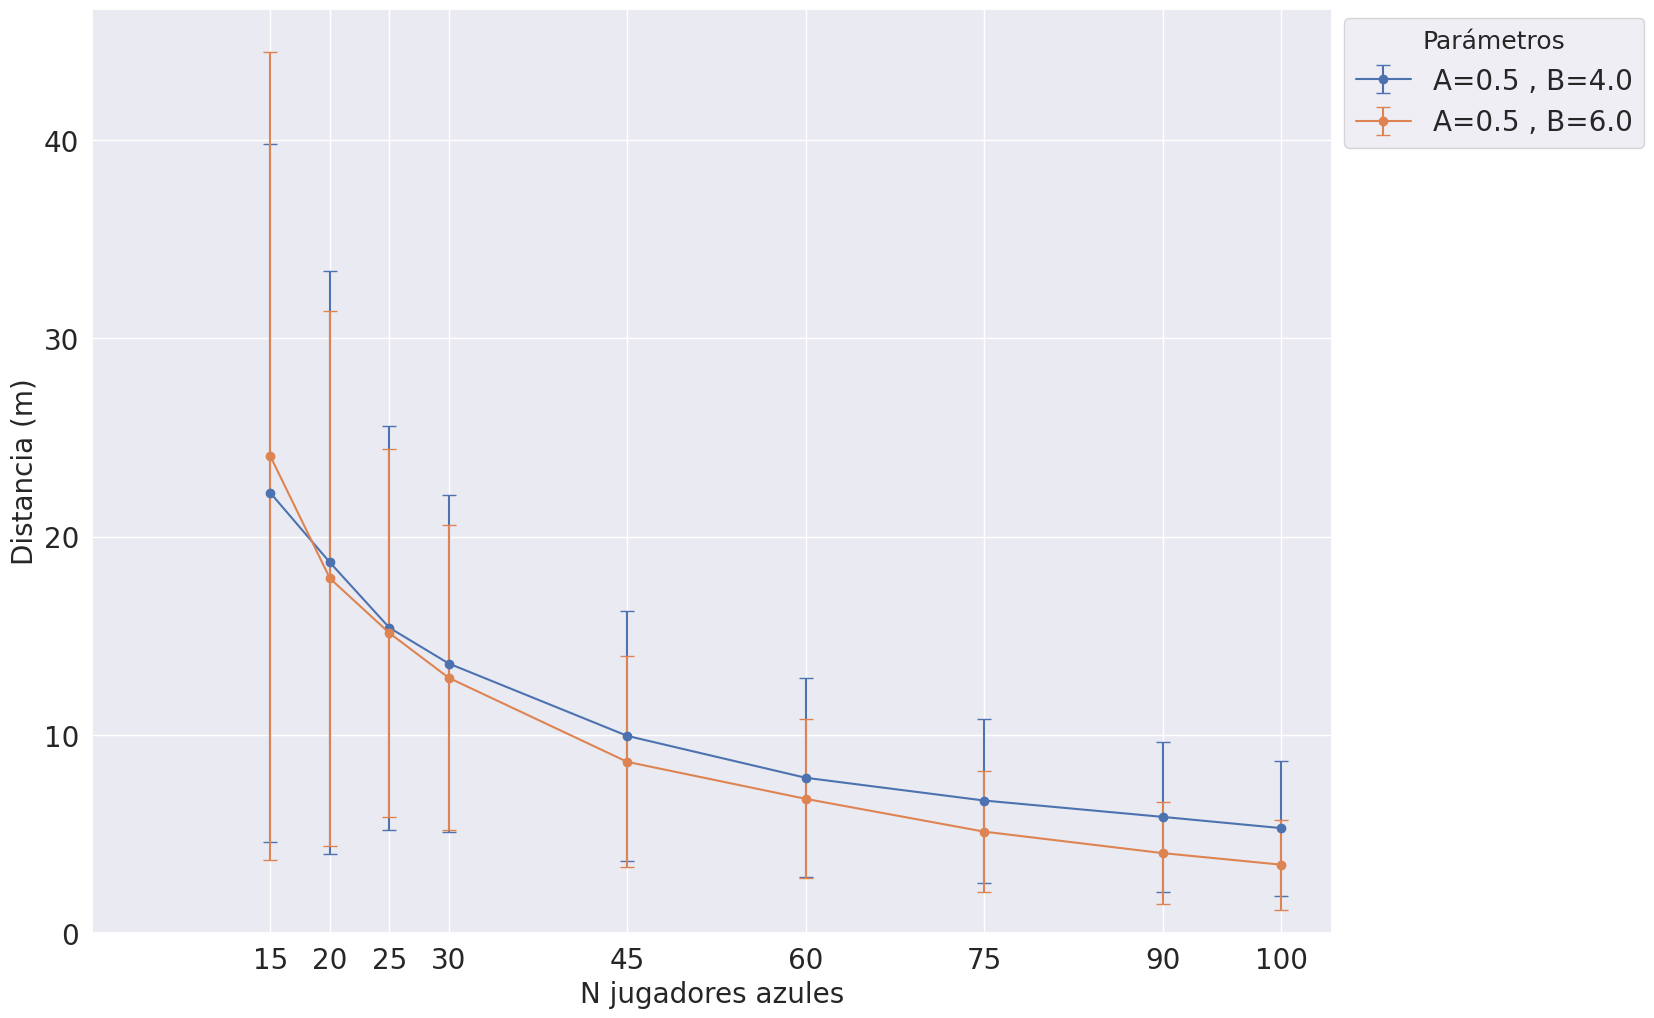

In [87]:
dist_dict = dicts["dist"]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 12))

# Graficar cada conjunto de datos (a=4, b=1 y a=6, b=0.5)
for label, stats in dist_dict.items():
    stats = np.array(stats)
    means = np.mean(np.abs(stats - 100), axis = 1)
    std = np.std(np.abs(stats - 100), axis = 1)
    a_value = float(label.split("_")[1])
    b_value = float(label.split("_")[3])
    ax.errorbar(n_values, means, yerr=std, label=f'A={a_value} , B={b_value}', fmt='o-', capsize=5)

# Personalizar el gráfico
ax.set_xlabel("N jugadores azules",  fontsize=20)
ax.set_ylabel("Distancia (m)",  fontsize=20)
ax.legend(title="Parámetros", loc=(1.01,0.85), fontsize=20)
ax.set_xticks(n_values)
ax.set_xlim(left=0)
ax.tick_params(labelsize=20)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.show()